In [1]:
from ultralytics import YOLO
import torch

In [2]:
# Verify the GPU is available
print(f"GPU available: {torch.cuda.is_available()}")
print(f"Actual device: {torch.device('cuda' if torch.cuda.is_available() else 'cpu')}")

GPU available: True
Actual device: cuda


In [3]:
model = YOLO("yolov8n.pt") #Load yolov8 nano

C:\Users\Agapito\anaconda3\envs\yolov88\lib\site-packages\ultralytics\nn\tasks.py:511: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cp

In [4]:
results = model.train(
    data='config.yaml',
    epochs=50,
    imgsz=640,
    batch=4,
    workers=2
)

New https://pypi.org/project/ultralytics/8.3.173 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.114  Python-3.10.18 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1050, 2048MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=config.yaml, epochs=50, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, r


image 1/1 C:\Users\Agapito\Documents\Plates\dataset\test\images\Cars429.png: 640x512 1 plate, 31.3ms
Speed: 0.0ms preprocess, 31.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


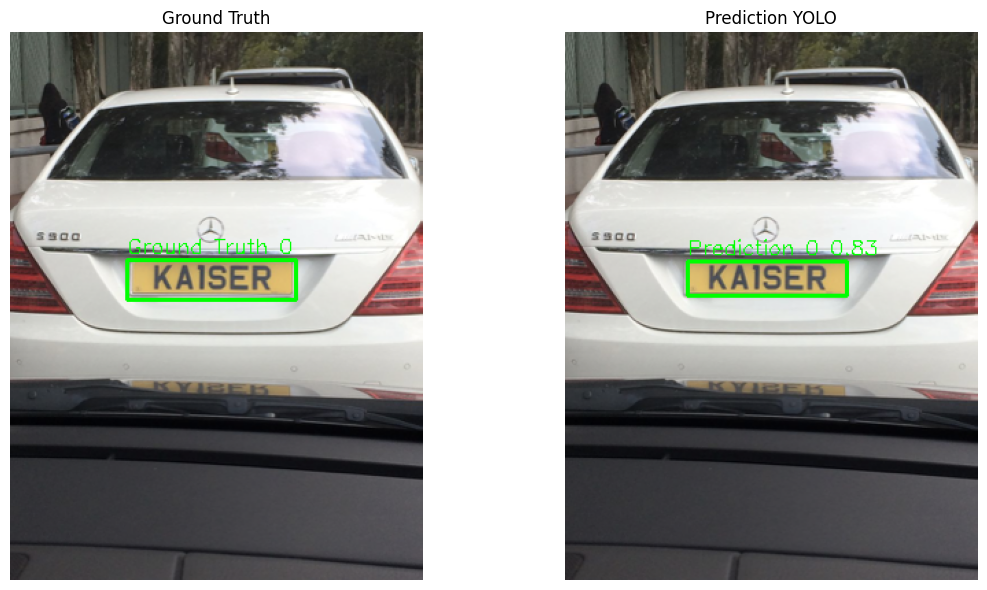

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import random
import cv2



# Config routes
model_path = './runs/detect/train/weights/best.pt'
images_dir = './dataset/test/images'
labels_dir = './dataset/test/labels'

# Load the custom model
model = YOLO(model_path)

# Choose a random test image
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random_image = random.choice(image_files)
image_path = os.path.join(images_dir, random_image)
label_path = os.path.join(labels_dir, os.path.splitext(random_image)[0] + '.txt')

# Load original image with the ground truth boxes
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w = image.shape[:2]
image_with_gt = image_rgb.copy()

# Draw the boxes
if os.path.exists(label_path):
    with open(label_path, 'r') as f:
        for line in f:
            cls, cx, cy, bw, bh = map(float, line.strip().split())
            x1 = int((cx - bw / 2) * w)
            y1 = int((cy - bh / 2) * h)
            x2 = int((cx + bw / 2) * w)
            y2 = int((cy + bh / 2) * h)
            cv2.rectangle(image_with_gt, (x1, y1), (x2, y2), (0, 255, 0), 2)  # verde
            cv2.putText(image_with_gt, f"Ground Truth {int(cls)}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

# Make the prediction
results = model.predict(source=image_path, save=False, conf=0.25)
result = results[0]  # solo una imagen
image_pred = image_rgb.copy()

# Draw the predictions
for box in result.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    cv2.rectangle(image_pred, (x1, y1), (x2, y2), (0, 255, 0), 2)  # azul
    cv2.putText(image_pred, f"Prediction {cls_id} {conf:.2f}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

# Show both images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_with_gt)
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_pred)
plt.title('Prediction YOLO')
plt.axis('off')

plt.tight_layout()
plt.show()

